In [1]:
import os
print("Current dir: "+os.getcwd())
import pandas as pd
import numpy as np
import keras
from keras.layers import Dense
from keras.models import Model
import tensorflow as tf


from keras.preprocessing.image import ImageDataGenerator
import scikitplot as skplt
import PIL
from numpy import asarray

from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

Current dir: C:\Users\user


Using TensorFlow backend.


Found 10800 images belonging to 2 classes.
Found 1198 images belonging to 2 classes.
Tensor("input_1:0", shape=(None, 227, 227, 3), dtype=float32)
test_label_shape: 1198
train_label_shape: 10800
y_prob_validation shape: (1198, 2)
y_prob_train shape: (10800, 2)


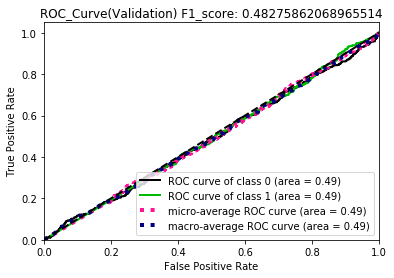

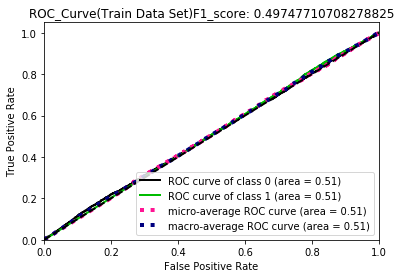

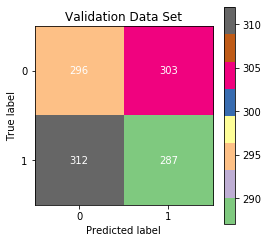

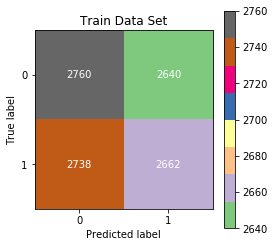

In [2]:
# Using predict_generator
os.chdir(r"C:\Users\user\Downloads\Dataset\Train Images")
path=os.getcwd()
train_gen=ImageDataGenerator(rescale=1/255,validation_split=0.1)
train_data=train_gen.flow_from_directory(path,target_size=(227,227),batch_size=10,subset='training')
validation_data=train_gen.flow_from_directory(path,target_size=(227,227),batch_size=5,subset='validation')
model=load_model("model2.h5")
print(model.input)
y_validation=validation_data.classes    #  Labels of a validation data set
y_train=train_data.classes              #  labels of a train data set
print("test_label_shape: "+str(len(y_validation)))
print("train_label_shape: "+str(len(y_train)))
y_prob_validation=model.predict_generator(validation_data)       # probabilities of a validation data set
y_prob_train=model.predict_generator(train_data)                # probabilities of a train data set
print("y_prob_validation shape: "+str(y_prob_validation.shape))
print("y_prob_train shape: "+str(y_prob_train.shape))
y_pred_validation = np.argmax(y_prob_validation, axis=-1)       # predictions of a validation data set
y_pred_train = np.argmax(y_prob_train, axis=-1)                 # predictions of a train data set
skplt.metrics.plot_roc(y_validation,y_prob_validation,title="ROC_Curve(Validation) F1_score: "+str(f1_score(y_validation,y_pred_validation)))
skplt.metrics.plot_roc(y_train,y_prob_train,title="ROC_Curve(Train Data Set)F1_score: "+str(f1_score(y_train,y_pred_train)))
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_validation,y_pred_validation,figsize=(4,4),title="Validation Data Set",cmap='Accent')
skplt.metrics.plot_confusion_matrix(y_train,y_pred_train,figsize=(4,4),title="Train Data Set",cmap="Accent")


Found 11998 images belonging to 2 classes.
Tensor("input_1_1:0", shape=(None, 227, 227, 3), dtype=float32)
train_label_shape: 11998
y_prob_train shape: (11998, 2)


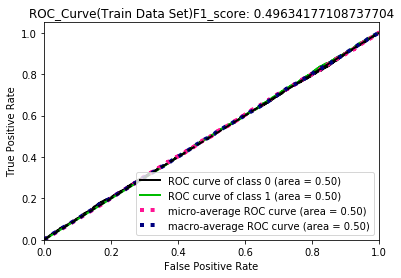

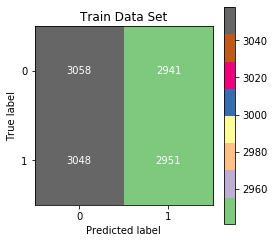

In [4]:
# on full data set using predict_generator
os.chdir(r"C:\Users\user\Downloads\Dataset\Train Images")
path=os.getcwd()
train_gen=ImageDataGenerator(rescale=1/255)
train_data=train_gen.flow_from_directory(path,target_size=(227,227),batch_size=10)

model=load_model("model2.h5")
print(model.input)
   
y_train=train_data.classes              #  labels of a train data set

print("train_label_shape: "+str(len(y_train)))

y_prob_train=model.predict_generator(train_data)                # probabilities of a train data set

print("y_prob_train shape: "+str(y_prob_train.shape))

y_pred_train = np.argmax(y_prob_train, axis=-1)                 # predictions of a train data set

skplt.metrics.plot_roc(y_train,y_prob_train,title="ROC_Curve(Train Data Set)F1_score: "+str(f1_score(y_train,y_pred_train)))
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(y_train,y_pred_train,figsize=(4,4),title="Train Data Set",cmap="Accent")

In [3]:
# USing predict method and I have moved all the images in one folder and also I have a csv file which has all the names and label 
# corresponding to the file name

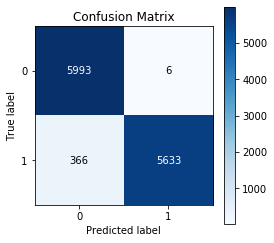

In [5]:
os.chdir(r"C:\Users\user\Downloads\DataSet")
path=os.getcwd()
train=pd.read_csv("train.csv")
train_images=train['Image_File'].to_list()
from keras.preprocessing import image
y_pred=[]
for file in train_images:
    path_file=os.path.join(r"C:\Users\user\Downloads\DataSet\TI",file) # TI directory which contains the data set from both the classes 
                                                                         
    img=image.load_img(path_file,target_size=(227,227)) 
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_pred.append(model.predict(img))
y_pred_np=np.array(y_pred)
y_pred_np=y_pred_np.reshape(11998,2)
y_pred_final=y_pred_np.argmax(axis=1)
train_labels=train['Class']
train_labels.replace({'Large':0,'Small':1},inplace=True)
y=np.array(train_labels)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y,y_pred_final,figsize=(4,4))